In [10]:
from scipy import stats
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    #Se utiliza para cambiar valores no numericos y codificarlos numericamente 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from collections import defaultdict
from sklearn import preprocessing #Paquete para hacer normalizacion de las variables.
from sklearn.preprocessing import RobustScaler

Se pide hacer un modelo que prediga los precios de la finca raiz dada una base de datos que fue tomada de https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data se pide una proyeccion utilizando los metodos de regresion tales como el lineal, Lasso y Ridge Model.

Cargamos los archivos que vamos a necesitar

In [11]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Limpieza de datos

Lo que haremos es primero cambiar todos los valores na y nan por 0, ademas de separar el saleprice del resto de los datos.

In [12]:
test = test.fillna(0)
train = train.fillna(0)

saleprice = train[['SalePrice']]
train1 = train.drop(['SalePrice'],axis=1)
union = pd.concat([train1, test])

Unimos  train y  test esto es para cambiar los valores no numerico y asi que me cambien todos a los valores correspondientes.  

In [44]:

union1 = union.drop(['Id'],axis=1)
pre = preprocessing.LabelEncoder()
mask = union1.dtypes.eq(np.object)
union1.loc[:, mask] = union1.loc[:, mask].astype(str).apply(pre.fit_transform)

Separamos los datos de nuevo para tener el train y test y poder hacer las correspondientes regresiones.

In [46]:
train1 = union1.iloc[:1460,:] 
test1= union1.iloc[1460:,:]


lo que vamos a hacer ahora es normalizar la variables, para esto utilizaremos un paquete (sklearn, RobustScaler) el cual lo que hace es tomar un arreglo y normaliza cada fila ahi incluida, Sin embargo para los precios utilizaremos log, pues al devolverme necesitare una funcion inversa que haga el trabajo(aun no se si con un automatico como sklearn se pueda).

In [48]:
colu = union1.to_numpy()
colt = colu.T
normal = RobustScaler().fit(colt)
normalize= normal.transform(colt)
unionnew = pd.DataFrame(normalize.T)
trainn = unionnew.iloc[:1460,:] 
testn= unionnew.iloc[1460:,:]


In [16]:
pricn= np.log(train["SalePrice"])

# Modelos de regresion
## linear model

In [17]:
linear_model2 = LinearRegression(normalize=True)
linear_model2.fit(trainn,pricn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

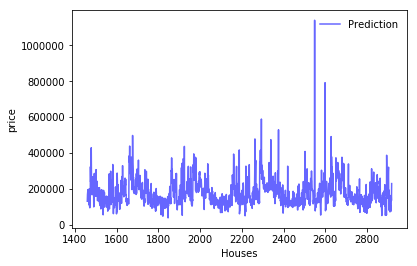

In [18]:
plt.plot(testn.index, np.exp(linear_model2.predict(testn)),'b',alpha=0.6, label='Prediction')
plt.legend(loc='best', frameon=False)
plt.xlabel('Houses')
plt.ylabel('price')
plt.show()

In [43]:
finallinear=np.exp(linear_model2.predict(testn))
f1= test[['Id']]
f1['saleprice']= finallinear
f1.to_csv("finallinear.csv")

C:\Users\Family\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Ridge model

In [26]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(trainn, pricn) 

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

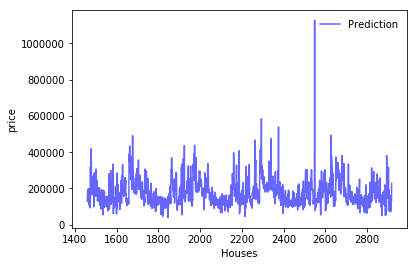

In [27]:
plt.plot(testn.index, np.exp(ridge_model.predict(testn)),'b',alpha=0.6, label='Prediction')
plt.legend(loc='best', frameon=False)
plt.xlabel('Houses')
plt.ylabel('price')
plt.show()

In [24]:
np.exp(ridge_model.predict(testn))

array([129796.46418847, 167615.14461067, 182752.74691938, ...,
       160976.73574212, 129945.80948789, 227618.35859556])

In [29]:
finalridge=np.exp(ridge_model.predict(testn))
f2= test[['Id']]
f2['saleprice']= finalridge
f2.to_csv("finalridge.csv")


C:\Users\Family\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Lasso model

In [49]:
lasso_model = Lasso(alpha=0.2,normalize=False, max_iter=1e6)
lasso_model.fit(trainn,pricn)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

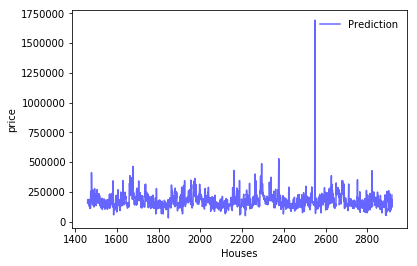

In [50]:
plt.plot(testn.index, np.exp(lasso_model.predict(testn)),'b',alpha=0.6, label='Prediction')
plt.legend(loc='best', frameon=False)
plt.xlabel('Houses')
plt.ylabel('price')
plt.show()

In [51]:
np.exp(lasso_model.predict(testn))

array([155368.163482  , 183123.56651106, 185897.81791164, ...,
       191192.04647938, 120172.39676727, 222569.70544339])

In [42]:
finallasso=np.exp(lasso_model.predict(testn))
f3= test[['Id']]
f3['saleprice']= finallasso
f3.to_csv("finallasso.csv")

C:\Users\Family\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
